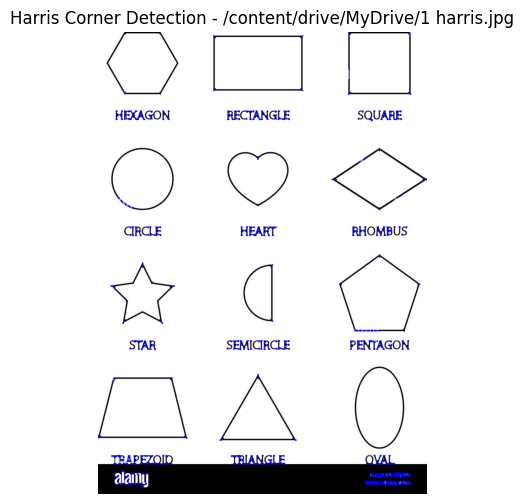

Number of corners detected in /content/drive/MyDrive/1 harris.jpg: 17630


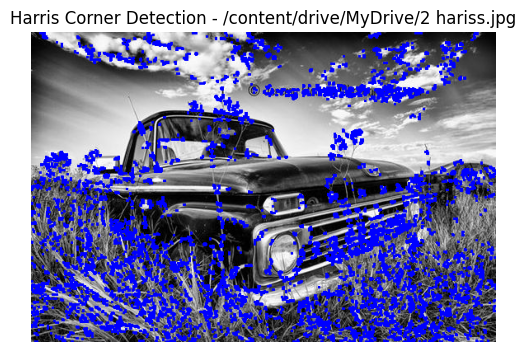

Number of corners detected in /content/drive/MyDrive/2 hariss.jpg: 43324


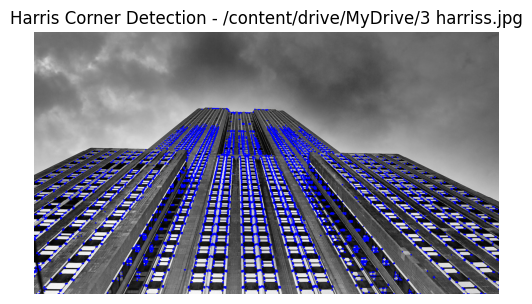

Number of corners detected in /content/drive/MyDrive/3 harriss.jpg: 71940


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Harris Corner Detection and count corners
def harris_corner_detection(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to the image
    blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

    # Harris Corner Detection
    corner_strength = cv2.cornerHarris(blurred_image, 2, 3, 0.04)

    # Dilate the corner image to enhance corner points
    corner_strength = cv2.dilate(corner_strength, None)

    # Threshold to identify the corners (0.01 times the maximum corner strength)
    threshold = 0.01 * corner_strength.max()

    # Create a color image to highlight the corners
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color_image[corner_strength > threshold] = [0, 0, 255]  # Red color for corners

    # Count number of corners
    num_corners = np.sum(corner_strength > threshold)

    return color_image, num_corners

# List of image paths (These are your specific images)
image_paths = [
    '/content/drive/MyDrive/1 harris.jpg',
    '/content/drive/MyDrive/2 hariss.jpg',
    '/content/drive/MyDrive/3 harriss.jpg'
]

# Loop through images and apply Harris Corner Detection
for image_path in image_paths:
    # Apply Harris Corner Detection
    result_image, num_corners = harris_corner_detection(image_path)

    # Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(result_image)
    plt.title(f'Harris Corner Detection - {image_path}')
    plt.axis('off')  # Hide axes
    plt.show()

    # Print the number of corners detected
    print(f"Number of corners detected in {image_path}: {num_corners}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Option 1: Matches (Score: 55)
Option 2: Does Not Match (Score: 0)
Option 3: Does Not Match (Score: 0)


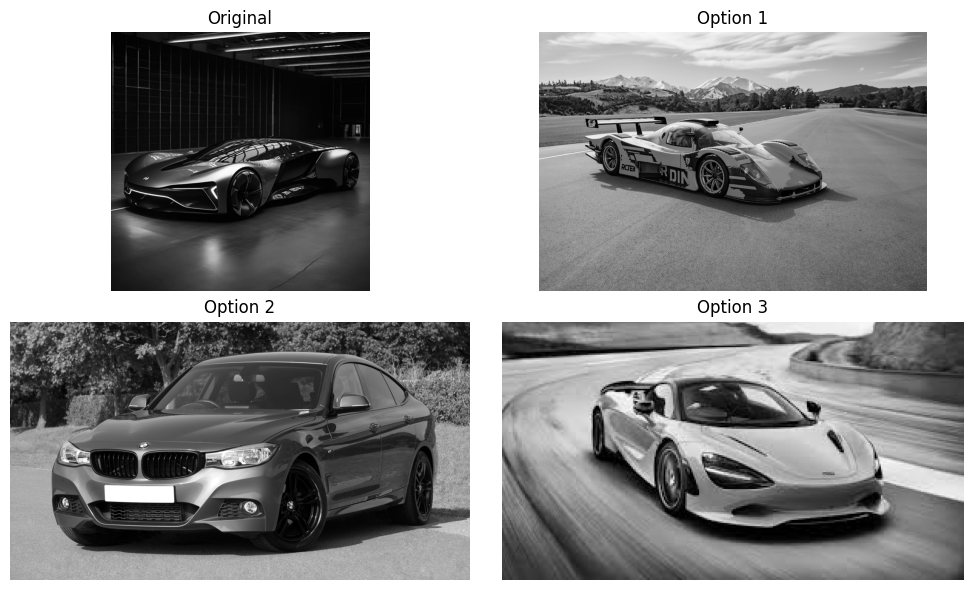

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Updated file paths
original_image_path = '/content/drive/MyDrive/harris 1.png'
image_paths = [
    '/content/drive/MyDrive/harriss 2.jpg',  # Rotated Image 1
    '/content/drive/MyDrive/harriss 3.jpg',  # Rotated Image 2
    '/content/drive/MyDrive/harris 4.jpg'   # Another Image
]

# Load original image
original = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
titles = ["Option 1", "Option 2", "Option 3"]

# Function to detect corners using Harris
def detect_corners(img):
    corners = cv2.cornerHarris(np.float32(img), blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)  # Enhance corner points
    threshold = 0.01 * corners.max()
    keypoints = np.argwhere(corners > threshold)  # Select corners above the threshold
    return keypoints

# Compute corner matches
def compare_corners(corners1, corners2):
    # Convert corner arrays to sets of tuples for easy comparison
    corners1_set = set(map(tuple, corners1))
    corners2_set = set(map(tuple, corners2))
    # Compute the intersection of corner sets
    common_corners = corners1_set.intersection(corners2_set)
    return len(common_corners)

# Detect corners in the original image
original_corners = detect_corners(original)

# Compare each image to the original
results = {}
for idx, img in enumerate(images):
    corners = detect_corners(img)
    match_score = compare_corners(original_corners, corners)
    results[titles[idx]] = match_score

# Threshold for determining a match (adjustable)
match_threshold = 50  # Set empirically based on corner density

# Determine matches
for title, score in results.items():
    is_match = score >= match_threshold
    print(f"{title}: {'Matches' if is_match else 'Does Not Match'} (Score: {score})")

# Optional: Display the images
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 2, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()
